<a href="https://colab.research.google.com/github/msivakumar47/SIVAKUMAR-M/blob/main/k_means_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data: 3 clusters, 500 samples
X, y = make_blobs(n_samples=500, centers=3, random_state=42)


In [7]:
def initialize_centroids(X, K):
    indices = np.random.choice(X.shape[0], K, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, K):
    return np.array([X[labels == k].mean(axis=0) for k in range(K)])

def kmeans(X, K, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, K)
        if np.all(np.linalg.norm(centroids - new_centroids, axis=1) < tol):
            break
        centroids = new_centroids
    return labels, centroids


In [8]:
def silhouette_score(X, labels):
    n = len(X)
    silhouette_vals = np.zeros(n)
    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == k] for k in set(labels) if k != labels[i]]
        a = np.mean(np.linalg.norm(same_cluster - X[i], axis=1)) if len(same_cluster) > 1 else 0
        b = np.min([np.mean(np.linalg.norm(cluster - X[i], axis=1)) for cluster in other_clusters]) if other_clusters else 0
        silhouette_vals[i] = (b - a) / max(a, b) if max(a, b) > 0 else 0
    return np.mean(silhouette_vals)


In [9]:
scores = {}
results = {}
for K in [2, 3, 4]:
    labels, centroids = kmeans(X, K)
    score = silhouette_score(X, labels)
    scores[K] = score
    results[K] = (labels, centroids)
    print(f"K={K}, Silhouette Score={score:.3f}")


K=2, Silhouette Score=0.704
K=3, Silhouette Score=0.845
K=4, Silhouette Score=0.670


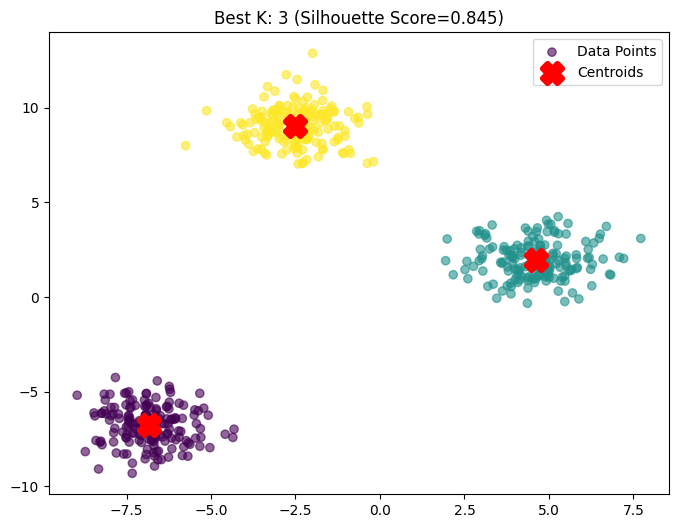

In [10]:
best_K = max(scores, key=scores.get)
best_labels, best_centroids = results[best_K]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', alpha=0.6, label='Data Points')
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], marker='X', s=200, linewidths=4, color='red', label='Centroids')
plt.title(f"Best K: {best_K} (Silhouette Score={scores[best_K]:.3f})")
plt.legend()
plt.show()
